In [313]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, RobustScaler
%matplotlib inline
import datetime
import holidays

In [314]:
df = pd.read_csv("train.csv")
df.shape

(33441, 18)

In [315]:
df.head(10)

,_id,segment_id,date,weekday,period,LOS,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type,long_snode,lat_snode,long_enode,lat_enode
0,0,26,2021-04-16,4,period_0_30,A,366428456,366416066,116,32575820,NaN,4,Nguyễn Văn Bá,tertiary,106.768732,10.841506,106.769254,10.842422
1,1,33,2020-08-02,6,period_23_30,C,366469460,3792257828,26,32575862,NaN,3,Đường số 5,secondary,106.761957,10.878650,106.762143,10.878808
2,2,33,2020-08-03,0,period_0_00,D,366469460,3792257828,26,32575862,NaN,3,Đường số 5,secondary,106.761957,10.878650,106.762143,10.878808
3,3,67,2021-03-09,1,period_9_30,B,366403668,5755066033,7,32575862,NaN,3,Đường số 5,secondary,106.768412,10.880817,106.768461,10.880771
4,4,67,2021-03-23,1,period_9_30,B,366403668,5755066033,7,32575862,NaN,3,Đường số 5,secondary,106.768412,10.880817,106.768461,10.880771
5,5,70,2020-08-02,6,period_23_30,D,5816921541,4614188871,8,32575864,40.0,3,Châu Văn Liêm,secondary,106.659032,10.751940,106.659019,10.752017
6,6,70,2020-08-03,0,period_0_00,E,5816921541,4614188871,8,32575864,40.0,3,Châu Văn Liêm,secondary,106.659032,10.751940,106.659019,10.752017
7,7,71,2020-08-02,6,period_23_30,E,366441747,5738173336,43,32575869,NaN,4,Lê Văn Thịnh,unclassified,106.765737,10.776592,106.765964,10.776912
8,8,71,2020-08-03,0,period_0_00,C,366441747,5738173336,43,32575869,NaN,4,Lê Văn Thịnh,unclassified,106.765737,10.776592,106.765964,10.776912
9,9,161,2020-09-11,4,period_0_30,A,3202462316,3202462317,21,32575935,NaN,3,Tân Phú,primary_link,106.723620,10.733619,106.723813,10.733604


In [316]:
drop_cols = ['_id', 'segment_id', 'date','s_node_id','e_node_id', 'street_name','street_id', 'long_enode', 'lat_enode']

In [317]:
VN_holidays = holidays.VN()
print('01-02-2024' in VN_holidays)

False


In [318]:
def holiday(date):
    if date in VN_holidays:
        return 1
    else:
        return 0
df['holiday'] = df['date'].map(holiday)

In [319]:
df['holiday'].value_counts()

holiday
0    33337
1      104
Name: count, dtype: int64

In [320]:
df = df.drop(drop_cols, axis = 1)

In [321]:
label = {'A':0,'B':1,'C':2, 'D':3, 'E':4, 'F':5}
def LOS_encode(val):
    return label[val]
df['LOS'] = df['LOS'].map(LOS_encode)

In [322]:
period = {'period_0_30':1, 'period_23_30':45, 'period_0_00':0, 'period_9_30':19,
       'period_4_30':9, 'period_7_30':15, 'period_14_00':28, 'period_3_00':6,
       'period_4_00':8, 'period_14_30':29, 'period_5_00':10, 'period_6_30':13,
       'period_7_00':14, 'period_5_30':11, 'period_6_00':12, 'period_15_00':30,
       'period_3_30':7, 'period_8_00':16, 'period_13_30':27, 'period_2_30':5,
       'period_10_30':21, 'period_11_00':22, 'period_1_00':2, 'period_11_30':23,
       'period_12_00':24, 'period_12_30':25, 'period_8_30':17, 'period_9_00':18,
       'period_10_00':20, 'period_1_30':3, 'period_15_30':31, 'period_2_00':4,
       'period_16_00':32, 'period_23_00':44, 'period_13_00':26, 'period_22_30':43,
       'period_21_30':41, 'period_22_00':42, 'period_17_30':35, 'period_18_00':36,
       'period_16_30':33, 'period_17_00':34, 'period_20_00':40, 'period_19_30':39,
       'period_18_30':37, 'period_19_00':38}
def per_encode(val):
    return period[val]
df['period'] = df['period'].map(per_encode)

In [323]:
df['street_type'].value_counts()

street_type
tertiary          13857
primary           11233
secondary          3460
unclassified       2021
trunk              1858
primary_link        350
trunk_link          279
secondary_link      127
tertiary_link        74
residential          67
motorway             59
house                20
motorway_link         9
car                   4
company               4
school                4
fuel                  4
government            2
marketplace           2
bank                  1
bus_station           1
convenience           1
clothes               1
university            1
pitch                 1
cinema                1
Name: count, dtype: int64

In [324]:
df['street_type'].unique()

array(['tertiary', 'secondary', 'unclassified', 'primary_link', 'primary',
       'trunk', 'trunk_link', 'residential', 'secondary_link',
       'tertiary_link', 'motorway_link', 'pitch', 'motorway',
       'convenience', 'university', 'car', 'house', 'company', 'school',
       'marketplace', 'fuel', 'clothes', 'government', 'bus_station',
       'bank', 'cinema'], dtype=object)

In [325]:
st_type = {'tertiary':0, 'secondary':1, 'unclassified':2, 'primary_link':3, 'primary':4,
       'trunk':5, 'trunk_link':6, 'residential':7, 'secondary_link':8,
       'tertiary_link':9, 'motorway_link':10, 'pitch':11, 'motorway':12,
       'convenience':13, 'university':14, 'car':15, 'house':16, 'company':17, 'school':18,
       'marketplace':19, 'fuel':20, 'clothes':21, 'government':22, 'bus_station':23,
       'bank':24, 'cinema':25}

def st_type_encode(value):
    return st_type[value]

In [326]:
df['street_type'] = df['street_type'].map(st_type_encode)

In [327]:
df.head()

,weekday,period,LOS,length,max_velocity,street_level,street_type,long_snode,lat_snode,holiday
0,4,1,0,116,NaN,4,0,106.768732,10.841506,0
1,6,45,2,26,NaN,3,1,106.761957,10.878650,0
2,0,0,3,26,NaN,3,1,106.761957,10.878650,0
3,1,19,1,7,NaN,3,1,106.768412,10.880817,0
4,1,19,1,7,NaN,3,1,106.768412,10.880817,0


In [328]:
df['max_velocity'].value_counts()

max_velocity
60.0     2539
80.0      858
40.0      590
50.0      558
70.0      186
20.0       91
30.0       84
120.0      26
10.0       10
45.0        3
100.0       1
Name: count, dtype: int64

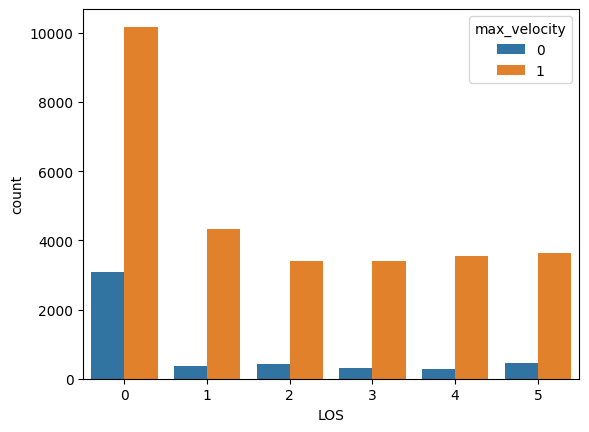

In [329]:
data = df.copy()
data['max_velocity'] = np.where(data['max_velocity'].isnull(), 1, 0)
sns.countplot(x="LOS", hue="max_velocity", data=data)
plt.show()

In [330]:
num_vars = ['lat_snode','long_snode','length','max_velocity']
cat_vars = ['weekday','period','LOS','street_level','street_type','holiday']

c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


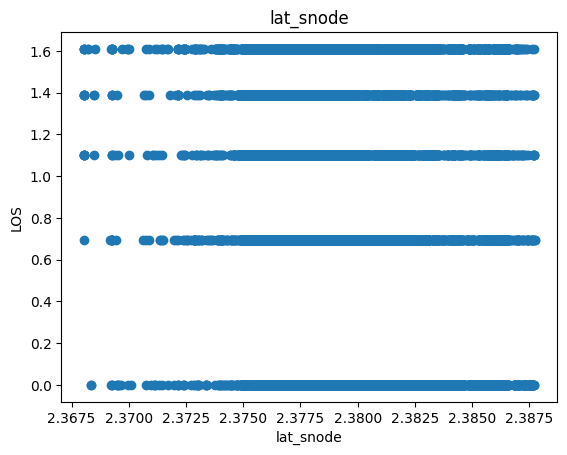

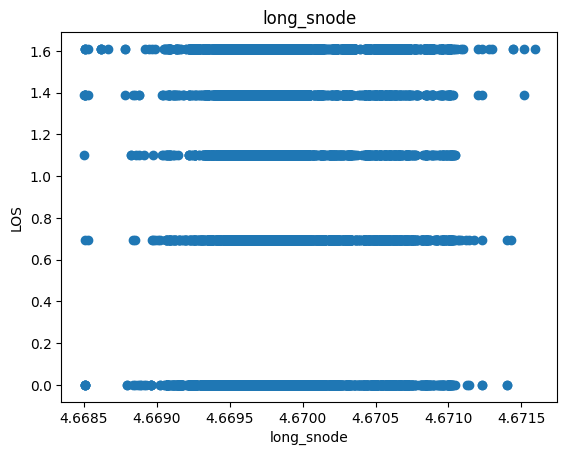

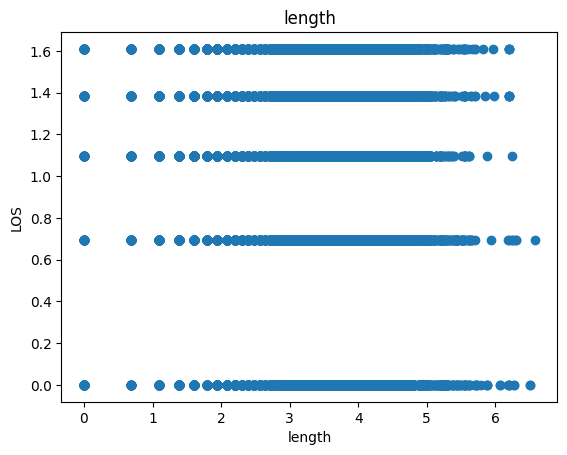

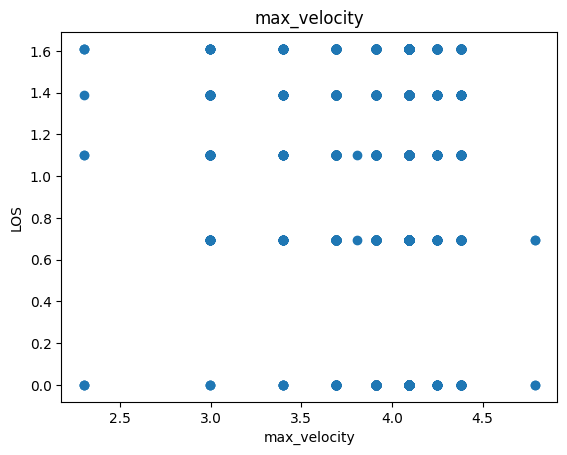

In [331]:
for feature in num_vars:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['LOS']=np.log(data['LOS'])
    plt.scatter(data[feature],data['LOS'])
    plt.xlabel(feature)
    plt.ylabel('LOS')
    plt.title(feature)
    plt.show()
    

In [332]:
df = df.loc[df['length'] != 0]
print(0 in df['length'].unique())

False


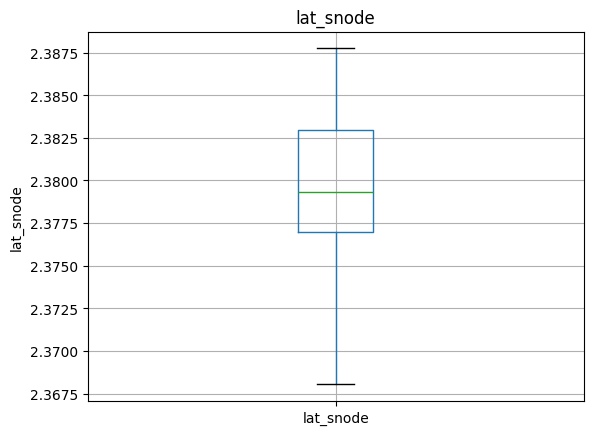

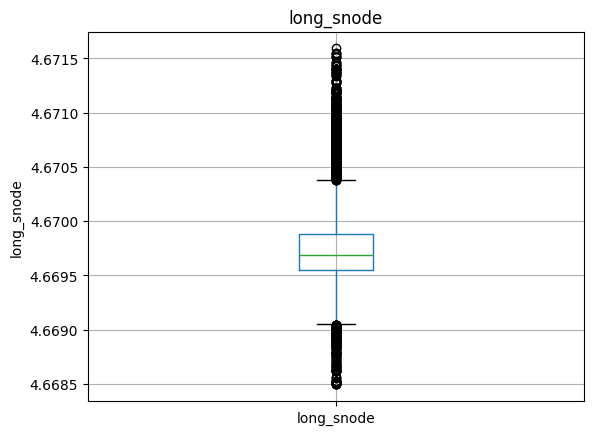

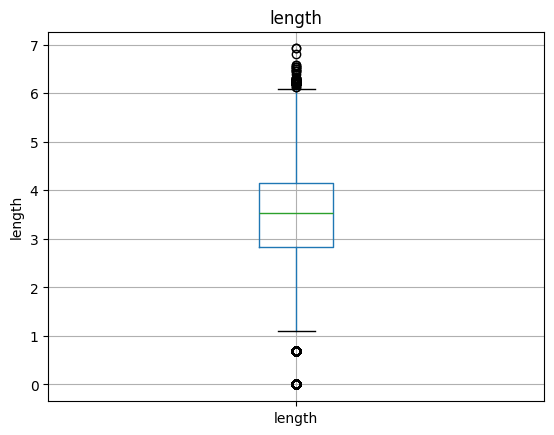

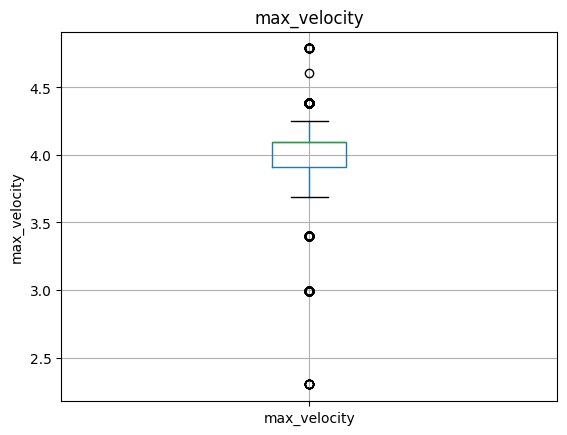

In [333]:
for feature in num_vars:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

MAX VELOCITY

In [334]:
model = RandomForestClassifier()
X = df[df['max_velocity'].notna()]
Y = df[df['max_velocity'].isna()]

In [335]:
train_feats = ['weekday','period','LOS','lat_snode','long_snode','length','street_level','street_type','holiday']
test_feats = ['max_velocity']

In [336]:
model.fit(X[train_feats],X[test_feats])

c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [337]:
df['max_velocity'].value_counts()

max_velocity
60.0     2538
80.0      858
40.0      590
50.0      558
70.0      186
20.0       91
30.0       80
120.0      26
10.0       10
45.0        3
100.0       1
Name: count, dtype: int64

In [338]:
data = pd.DataFrame()
vel_pred = model.predict(Y[train_feats])
data = X
temp = Y[train_feats]
temp['max_velocity'] = vel_pred
data = pd.concat([data,temp], ignore_index = True)

In [339]:
data['max_velocity'].value_counts()

max_velocity
60.0     9694
50.0     8443
40.0     8288
30.0     4029
80.0     1080
20.0     1064
70.0      707
120.0      32
10.0       31
45.0       15
100.0       1
Name: count, dtype: int64

In [340]:
data.head()

,weekday,period,LOS,length,max_velocity,street_level,street_type,long_snode,lat_snode,holiday
0,6,45,3,8,40.0,3,1,106.659032,10.751940,0
1,0,0,4,8,40.0,3,1,106.659032,10.751940,0
2,6,45,4,32,40.0,4,0,106.625519,10.744441,0
3,0,0,4,32,40.0,4,0,106.625519,10.744441,0
4,2,43,0,359,50.0,1,5,106.731920,10.799762,1


MODELS

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [342]:
def result(dataFrame,x_train,y_train,x_test,y_test):
    
    log = LogisticRegression()
    ada = AdaBoostClassifier()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier(n_estimators=500)
    bbc = BalancedBaggingClassifier()

    log.fit(x_train,y_train)
    ada.fit(x_train,y_train)
    dtc.fit(x_train,y_train)
    rfc.fit(x_train,y_train)
    bbc.fit(x_train,y_train)
    
    y_pred = log.predict(x_test)
    print("LogisticRegression :",metrics.classification_report(y_test,y_pred))

    y_pred = ada.predict(x_test)
    print("AdaBoost :",metrics.classification_report(y_test,y_pred))
   
    y_pred = dtc.predict(x_test)
    print("DecisionTree :",metrics.classification_report(y_test,y_pred))
    
    y_pred = rfc.predict(x_test)
    print("RandomForest :",metrics.classification_report(y_test,y_pred))
    
    y_pred = bbc.predict(x_test)
    print("BalancedBagging :",metrics.classification_report(y_test,y_pred))
   

PREDICTION 1

In [343]:
rob_scaler = RobustScaler()
for feature in num_vars:
    #data=df.copy()
    #data[feature]=np.log(data[feature])
    data[feature] = rob_scaler.fit_transform(data[[feature]])

In [344]:
data.head()

,weekday,period,LOS,length,max_velocity,street_level,street_type,long_snode,lat_snode,holiday
0,6,45,3,-0.565217,-0.5,3,1,-0.159259,-0.707731,0
1,0,0,4,-0.565217,-0.5,3,1,-0.159259,-0.707731,0
2,6,45,4,-0.043478,-0.5,4,0,-1.100836,-0.823249,0
3,0,0,4,-0.043478,-0.5,4,0,-1.100836,-0.823249,0
4,2,43,0,7.065217,0.0,1,5,1.888611,0.028923,1


In [345]:
x = data.drop(['LOS'],axis = 1)
y = data['LOS']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

result(dataFrame=data,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression :               precision    recall  f1-score   support

           0       0.52      0.81      0.64      2619
           1       0.45      0.37      0.41       941
           2       0.28      0.03      0.06       791
           3       0.32      0.45      0.38       744
           4       0.24      0.18      0.21       770
           5       0.17      0.03      0.05       812

    accuracy                           0.45      6677
   macro avg       0.33      0.31      0.29      6677
weighted avg       0.39      0.45      0.39      6677

AdaBoost :               precision    recall  f1-score   support

           0       0.63      0.87      0.73      2619
           1       0.61      0.41      0.49       941
           2       0.17      0.01      0.02       791
           3       0.39      0.47      0.42       744
           4       0.32      0.30      0.31       770
           5       0.40      0.36      0.38       812

    accuracy                           0.53  

In [346]:
# from sklearn.metrics import roc_auc_score,roc_curve
# fpr,tpr,threshold = roc_auc_score(y_test,y_pred1,multi_class='ovr')

<Axes: >

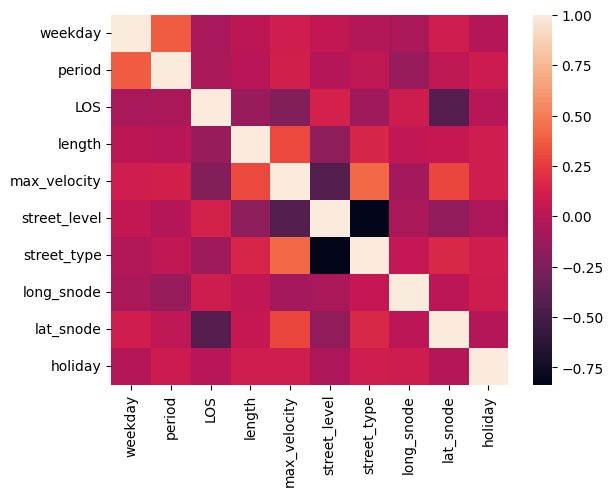

In [347]:
sns.heatmap(df.corr())

<Axes: ylabel='LOS'>

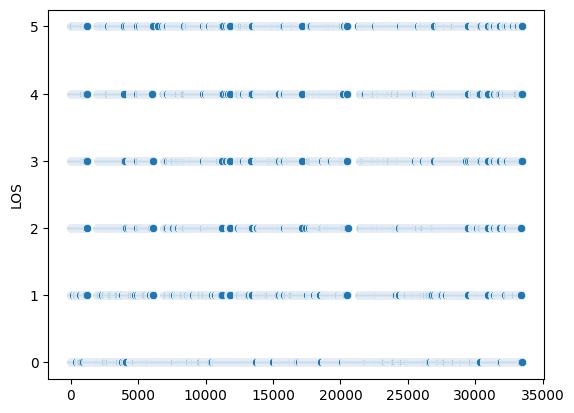

In [348]:
sns.scatterplot(df['LOS'])

PREDICTION - 2

In [349]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
x = data.drop('LOS',axis = 1)
y = data['LOS']
x_res,y_res = sampler.fit_resample(x,y)

In [350]:
data_res = pd.DataFrame(x_res)
data_res = pd.concat([data_res,y_res],axis = 1)
x = data_res.drop('LOS',axis=1)
y = data_res['LOS']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
result(dataFrame=data_res,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression :               precision    recall  f1-score   support

           0       0.49      0.55      0.52      2592
           1       0.52      0.60      0.56      2687
           2       0.26      0.12      0.16      2640
           3       0.36      0.59      0.45      2721
           4       0.30      0.26      0.28      2635
           5       0.29      0.23      0.26      2653

    accuracy                           0.39     15928
   macro avg       0.37      0.39      0.37     15928
weighted avg       0.37      0.39      0.37     15928

AdaBoost :               precision    recall  f1-score   support

           0       0.54      0.68      0.60      2592
           1       0.59      0.57      0.58      2687
           2       0.25      0.11      0.15      2640
           3       0.45      0.54      0.49      2721
           4       0.33      0.24      0.28      2635
           5       0.36      0.51      0.42      2653

    accuracy                           0.44  

PREDICTION - 3

In [351]:
df['max_velocity'] = df['max_velocity'].fillna(df['max_velocity'].mode().iloc[0])
df.head()

,weekday,period,LOS,length,max_velocity,street_level,street_type,long_snode,lat_snode,holiday
0,4,1,0,116,60.0,4,0,106.768732,10.841506,0
1,6,45,2,26,60.0,3,1,106.761957,10.878650,0
2,0,0,3,26,60.0,3,1,106.761957,10.878650,0
3,1,19,1,7,60.0,3,1,106.768412,10.880817,0
4,1,19,1,7,60.0,3,1,106.768412,10.880817,0


In [352]:
x = df.drop('LOS',axis=1)
y = df['LOS']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)
result(dataFrame=df,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:147

LogisticRegression :               precision    recall  f1-score   support

           0       0.43      0.89      0.58     10638
           1       0.47      0.41      0.44      3764
           2       0.00      0.00      0.00      3054
           3       0.46      0.21      0.29      2963
           4       0.22      0.01      0.01      2999
           5       0.00      0.00      0.00      3290

    accuracy                           0.44     26708
   macro avg       0.26      0.25      0.22     26708
weighted avg       0.31      0.44      0.33     26708

AdaBoost :               precision    recall  f1-score   support

           0       0.63      0.84      0.72     10638
           1       0.55      0.40      0.46      3764
           2       0.23      0.05      0.08      3054
           3       0.42      0.46      0.44      2963
           4       0.31      0.29      0.30      2999
           5       0.36      0.32      0.34      3290

    accuracy                           0.52  